<a href="https://colab.research.google.com/github/harim061/data_science01/blob/main/Harim/dataS6_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 공공데이터 상권정보 분석해 보기
- 국가증정데이터인 상권정보를 살펴봅니다.

## 1.1 필요한 라이브러리 불러오기


In [49]:
import pandas as pd
import numpy as np
import seaborn as sns

## 1.2 시각화를 위한 폰트 설정

In [50]:
!pip install koreanize-matplotlib

import koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 69.5 MB/s eta 0:00:00


In [51]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import matplotlib
import matplotlib.font_manager

matplotlib.rcParams['font.family'] ='NanumGothic'

matplotlib.rcParams['axes.unicode_minus'] =False

import matplotlib as mpl
mpl.get_configdir()

%matplotlib inline

from IPython.display import set_matplotlib_formats

%config InlineBackend.figure_format = 'retina'


## 1.3 데이터 로드하기
- 판다스에서 데이터를 로드할 때는 read_csv를 사용
- 데이터를 로드해서 df라는 변수에 담기
- shpae를 통해 데이터의 갯수 찍기(행,열)

In [4]:
from google.colab import files
import warnings
warnings.filterwarnings("ignore")
data = files.upload()


Saving 소상공인시장진흥공단_상가업소정보_의료기관_201909.csv to 소상공인시장진흥공단_상가업소정보_의료기관_201909.csv


In [9]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(data['소상공인시장진흥공단_상가업소정보_의료기관_201909.csv']))
df.shape

(91335, 39)

## 1.4 데이터 미리보기
- head, tail을 통해 미리 볼 수 있음

In [10]:
# head로 데이터를 미리보기
# shift + tab : docstring(공식문서) 볼 수 있
df.head(3)

상가업소번호        상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
0  19956873     하나산부인과  NaN         S       의료       S01       병원    S01B10   
1  20024149   타워광명내과의원  NaN         S       의료       S01       병원    S01B07   
2  20152277  조정현신경외과의원  NaN         S       의료       S01       병원    S01B15   

  상권업종소분류명 표준산업분류코드  ...                     건물관리번호      건물명  \
0     산부인과   Q86201  ...  4127310900110810000010857  산호한양아파트   
1    내과/외과   Q86201  ...  1168011800104670014000001      NaN   
2     신경외과   Q86201  ...  4139013200117400001017064    한라프라자   

                 도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도  \
0   경기도 안산시 단원구 달미로 10  425764.0  15236.0  NaN  NaN  NaN  126.814295   
1  서울특별시 강남구 언주로30길 39  135270.0   6292.0  NaN  4.0  NaN  127.053198   
2    경기도 시흥시 중심상가로 178  429450.0  15066.0  NaN  NaN  NaN  126.734841   

          위도  
0  37.336344  
1  37.488742  
2  37.344955  

[3 rows x 39 columns]

In [11]:
# tail로 마지막 데이터 불러오기
df.tail(1)

상가업소번호           상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
91334  16109073  천안김안과천안역본점의원  NaN         S       의료       S01       병원   

      상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리번호  건물명  \
91334    S01B13     안과의원   Q86201  ...  4413110700102660017016314  김안과   

                     도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도  \
91334  충청남도 천안시 동남구 중앙로 92  330952.0  31127.0  NaN  NaN  NaN  127.152651   

             위도  
91334  36.80664  

[1 rows x 39 columns]

## 1.5 데이터 요약하기
### 1.5.1 데이터 요약정보

In [12]:
# info로 데이터를 요약해서 봄
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

### 1.5.2 컬럼명 보기

In [13]:
# 컬럼명만 출력
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

### 1.5.3 데이터 타입

In [14]:
# 데이터 타입만 출력
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드           int64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드          int64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호        object
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보           object
호정보           object
경도           float64
위도           float64
dtype: object

## 1.6 결측치

In [15]:
df.isnull()
# data 값이 null 값이냐
# true면 null

상가업소번호    상호명    지점명  상권업종대분류코드  상권업종대분류명  상권업종중분류코드  상권업종중분류명  \
0       False  False   True      False     False      False     False   
1       False  False   True      False     False      False     False   
2       False  False   True      False     False      False     False   
3       False  False   True      False     False      False     False   
4       False  False  False      False     False      False     False   
...       ...    ...    ...        ...       ...        ...       ...   
91330   False  False  False      False     False      False     False   
91331   False  False  False      False     False      False     False   
91332   False  False   True      False     False      False     False   
91333   False  False   True      False     False      False     False   
91334   False  False   True      False     False      False     False   

       상권업종소분류코드  상권업종소분류명  표준산업분류코드  ...  건물관리번호    건물명  도로명주소  구우편번호  신우편번호  \
0          False     False     False  ...   False  False  False  False  False   
1          False     False     False  ...   False   True  False  False  False   
2          False     False     False  ...   False  False  False  False  False   
3          False     False      True  ...   False   True  False  False  False   
4          False     False     False  ...   False   True  False  False  False   
...          ...       ...       ...  ...     ...    ...    ...    ...    ...   
91330      False     False     False  ...   False   True  False  False  False   
91331      False     False     False  ...   False  False  False  False  False   
91332      False     False     False  ...   False  False  False  False  False   
91333      False     False     False  ...   False   True  False  False  False   
91334      False     False     False  ...   False  False  False  False  False   

        동정보    층정보   호정보     경도     위도  
0      True   True  True  False  False  
1      True  False  True  False  False  
2      True   True  True  False  False  
3      True  False  True  False  False  
4      True  False  True  False  False  
...     ...    ...   ...    ...    ...  
91330  True   True  True  False  False  
91331  True   True  True  False  False  
91332  True  False  True  False  False  
91333  True   True  True  False  False  
91334  True   True  True  False  False  

[91335 rows x 39 columns]

In [16]:
null_count = df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

<Axes: >

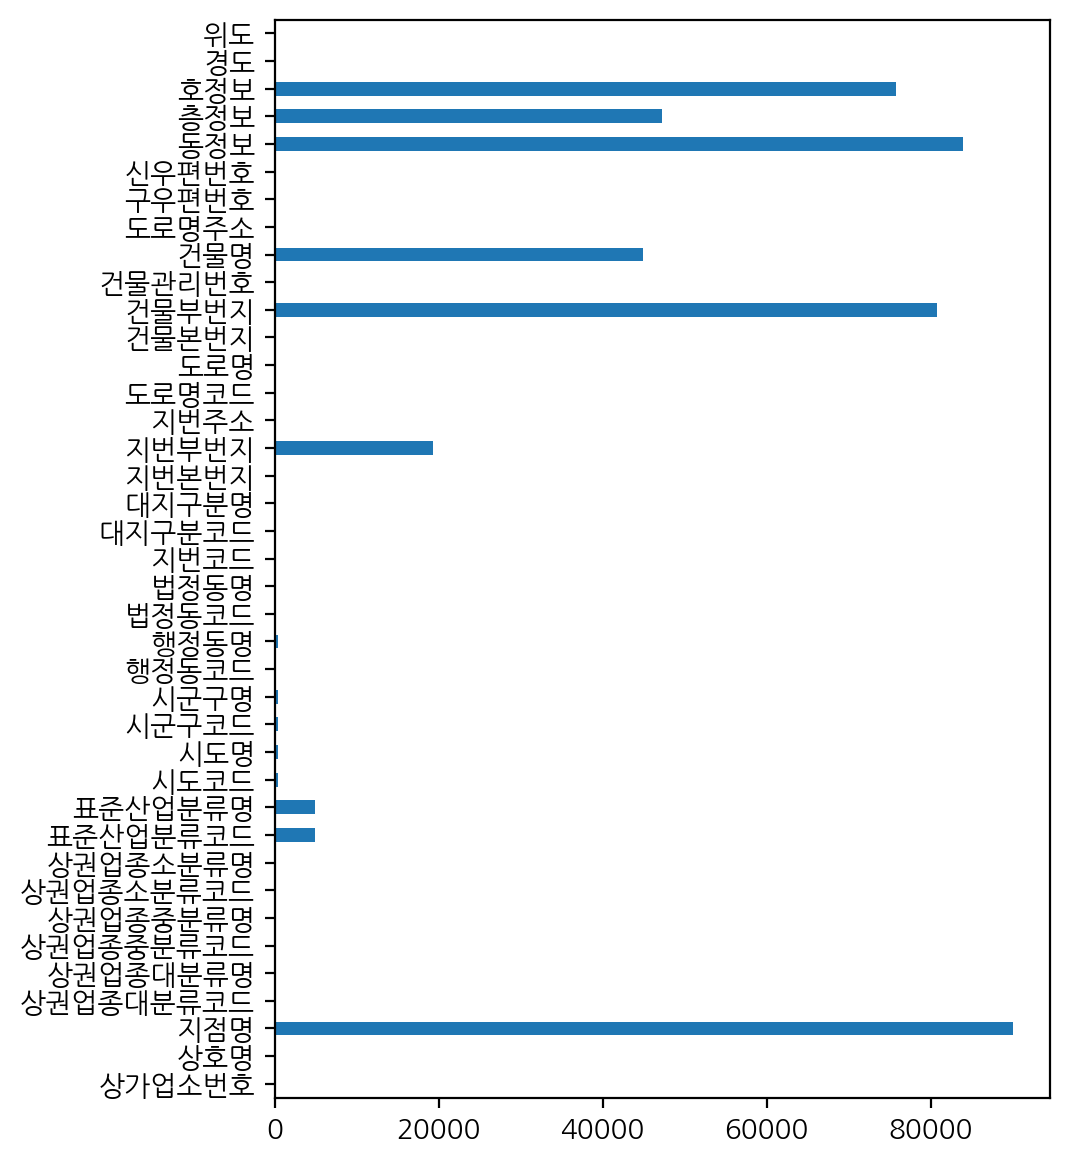

In [52]:
# plot.bar로 표현
null_count.plot.barh(figsize=(5,7))

In [18]:
# reset_index를 통해서 데이터프레임 만들어줌
df_null_count = null_count.reset_index()
df_null_count.head()

index      0
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

## 1.7 컬럼명 변경하기

In [19]:
df_null_count.columns = ["컬럼명","결축치수"]
df_null_count.head()

컬럼명   결축치수
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

## 1.8 정렬하기

In [20]:
# sort_values를 통해 정렬하기
df_null_count_top = df_null_count.sort_values(by="결축치수",ascending=False).head(10)
df_null_count_top

컬럼명   결축치수
2        지점명  89989
34       동정보  83929
28     건물부번지  80731
36       호정보  75784
35       층정보  47291
30       건물명  44882
23     지번부번지  19256
9   표준산업분류코드   4922
10   표준산업분류명   4922
11      시도코드    379

## 1.9 특정 컬럼만 불러오기

In [21]:
# 지점명 컬럼을 불러온다
# NaN == Not a number 의 역자로 결축치를 의미

df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [22]:
# "컬럼명" 이라는 컬럼의 값만 가져와서 drop_columns 라는 변수에 담기
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [23]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져옴
df[drop_columns].head()

지점명  동정보  건물부번지  호정보  층정보      건물명  지번부번지 표준산업분류코드         표준산업분류명  시도코드
0  NaN  NaN    NaN  NaN  NaN  산호한양아파트    NaN   Q86201           일반 의원  41.0
1  NaN  NaN    NaN  NaN  4.0      NaN   14.0   Q86201           일반 의원  11.0
2  NaN  NaN    NaN  NaN  NaN    한라프라자    1.0   Q86201           일반 의원  41.0
3  NaN  NaN    NaN  NaN  5.0      NaN    1.0      NaN             NaN  26.0
4  수지점  NaN    NaN  NaN  1.0      NaN    2.0   G47811  의약품 및 의료용품 소매업  41.0

## 1.10 제거하기

In [24]:
# axis= 0 행 / axis=1 열
print(df.shape)
df =df.drop(drop_columns,axis=1)
print(df.shape)

(91335, 39)
(91335, 29)


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-null  object 
 20  도로명코드 

## 1.11 기초 통계값 보기
### 1.11.1 기초 통계 수치

In [54]:
# 평균값
df["위도"].mean()

36.62471119236685

In [55]:
# 중앙값
df["위도"].median()

37.2346523177033

In [56]:
# 최댓값
df["위도"].max()

38.4996585705598

In [57]:
# 최솟값
df["위도"].min()

33.2192896688307

In [58]:
# 갯수
df["위도"].count()

91335

### 1.11.2 기초통계값 요약하기 - describe

In [59]:
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [60]:
# 데이터프레임 형태도 생성
# 리스트형태로 ㄱ ㄱ

df[["위도","경도"]].describe()

위도            경도
count  91335.000000  91335.000000
mean      36.624711    127.487524
std        1.041361      0.842877
min       33.219290    124.717632
25%       35.811830    126.914297
50%       37.234652    127.084550
75%       37.507463    128.108919
max       38.499659    130.909912

In [61]:
# 숫자형 데이터타입 요약
df.describe(include="number")


상가업소번호         시군구코드         행정동코드         법정동코드          지번코드  \
count  9.133500e+04  90956.000000  9.133500e+04  9.128000e+04  9.133500e+04   
mean   2.121818e+07  32898.381877  3.293232e+09  3.293385e+09  3.293191e+18   
std    5.042828e+06  12985.393171  1.297387e+09  1.297706e+09  1.297393e+18   
min    2.901108e+06  11110.000000  1.111052e+09  1.111010e+09  1.111010e+18   
25%    2.001931e+07  26350.000000  2.635065e+09  2.635011e+09  2.635011e+18   
50%    2.211900e+07  41117.000000  4.111758e+09  4.111710e+09  4.111711e+18   
75%    2.480984e+07  43113.000000  4.311370e+09  4.311311e+09  4.311311e+18   
max    2.852470e+07  50130.000000  5.013061e+09  5.013032e+09  5.013061e+18   

             대지구분코드         지번본번지         도로명코드         건물본번지          구우편번호  \
count  91335.000000  91335.000000  9.133500e+04  91335.000000   91323.000000   
mean       1.001336    587.534549  3.293207e+11    251.200482  428432.911085   
std        0.036524    582.519364  1.297391e+11    477.456487  193292.339066   
min        1.000000      1.000000  1.111020e+11      0.000000  100011.000000   
25%        1.000000    162.000000  2.635042e+11     29.000000  302120.000000   
50%        1.000000    462.000000  4.111743e+11     92.000000  440300.000000   
75%        1.000000    858.000000  4.311332e+11    257.000000  602811.000000   
max        2.000000   7338.000000  5.013049e+11   8795.000000  799801.000000   

             신우편번호            경도            위도  
count  91333.00000  91335.000000  91335.000000  
mean   28085.47698    127.487524     36.624711  
std    18909.01455      0.842877      1.041361  
min     1000.00000    124.717632     33.219290  
25%    11681.00000    126.914297     35.811830  
50%    24353.00000    127.084550     37.234652  
75%    46044.00000    128.108919     37.507463  
max    63643.00000    130.909912     38.499659

In [62]:
# 문자열 데이터타입만 요약
df.describe(include="object")

# top 가장많이 등장한~..
# frep 빈도수

상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명    시도명  \
count   91335     91335    91335     91335    91335     91335    91335  90956   
unique  56910         1        1         5        5        34       34     17   
top        리원         S       의료       S01       병원    S02A01       약국    경기도   
freq      152     91335    91335     60774    60774     18964    18964  21374   

         시군구명   행정동명   법정동명  대지구분명                  지번주소             도로명  \
count   90956  90956  91280  91335                 91335           91335   
unique    228   2791   2822      2                 53118           16610   
top        서구    중앙동     중동     대지  서울특별시 동대문구 제기동 965-1  서울특별시 강남구 강남대로   
freq     3165   1856    874  91213                   198             326   

                           건물관리번호                  도로명주소  
count                       91335                  91335  
unique                      54142                  54031  
top     1123010300109650001031604  서울특별시 동대문구 약령중앙로8길 10  
freq                          198                    198

### 1.11.3 중복제거한 값 보기
- unique로 중복을 제거한 값을 확인

In [63]:
# "상권업종대분류명"

df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [64]:
df["상권업종대분류명"].nunique()

1

In [65]:
df["상권업종중분류명"]

0              병원
1              병원
2              병원
3              병원
4          약국/한약방
           ...   
91330      약국/한약방
91331    의료관련서비스업
91332          병원
91333          병원
91334          병원
Name: 상권업종중분류명, Length: 91335, dtype: object

In [66]:
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [67]:
df["상권업종중분류명"].nunique()

5

In [68]:
# 상권업종소분류명
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [69]:
len(df["상권업종소분류명"].unique())

34

### 1.11.4 그룹화된 요약값 보기 - value_counts
- value_counts를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있음

In [70]:
# value_counts를 사용해서 카테고리 형태의 데이터 갯수를 세어볼 수 있음
df["시도명"].head()

0      경기도
1    서울특별시
2      경기도
3    부산광역시
4      경기도
Name: 시도명, dtype: object

In [71]:
city = df["시도명"].value_counts()
city

경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: 시도명, dtype: int64

In [72]:
# normalize=True 옵셕을 사용하면 비율로 구할 수 있음

city_normalize = df["시도명"].value_counts(normalize=True)
city_normalize

경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: 시도명, dtype: float64

<Axes: >

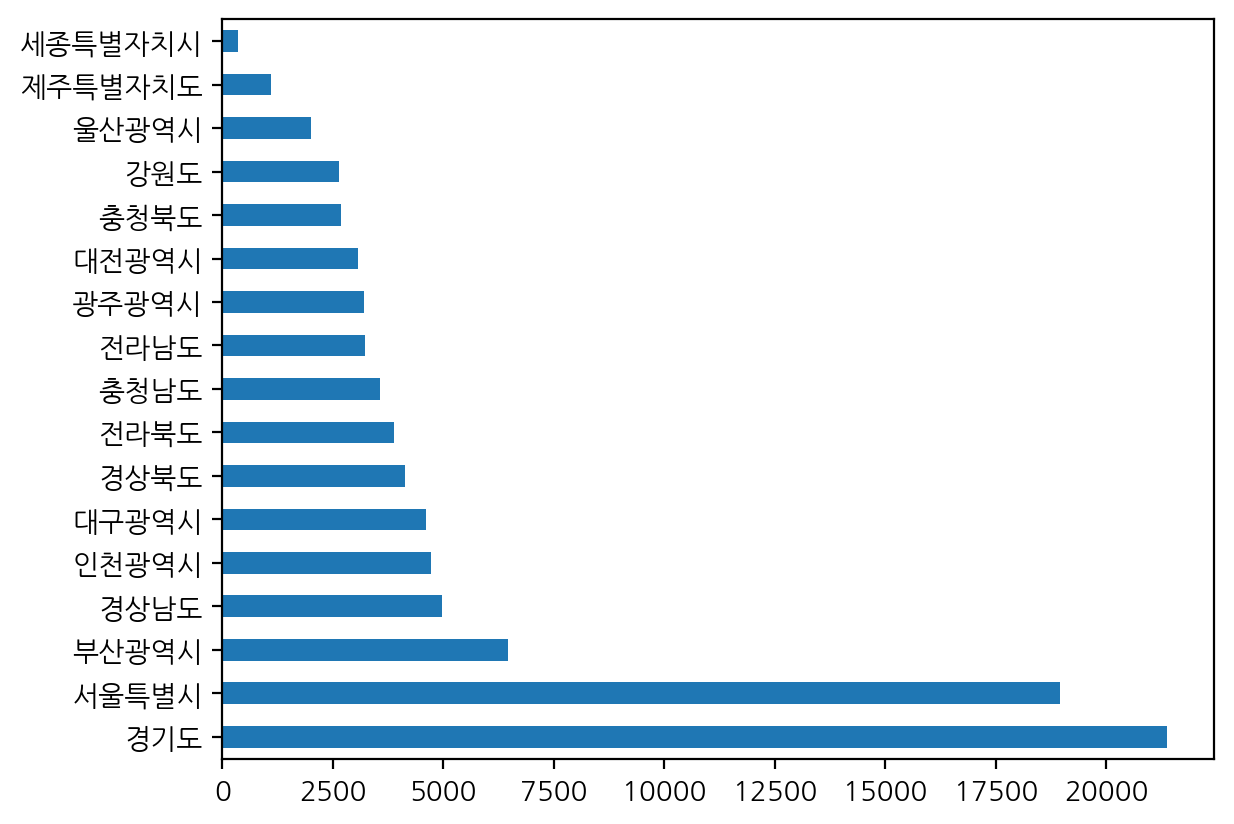

In [73]:
# Pandas에는 plot기능을 내장하고 있음
# 위에서 분석한 시도명 수를 막대그래프로 표현해 봅니다.
city.plot.barh()

<Axes: ylabel='시도명'>

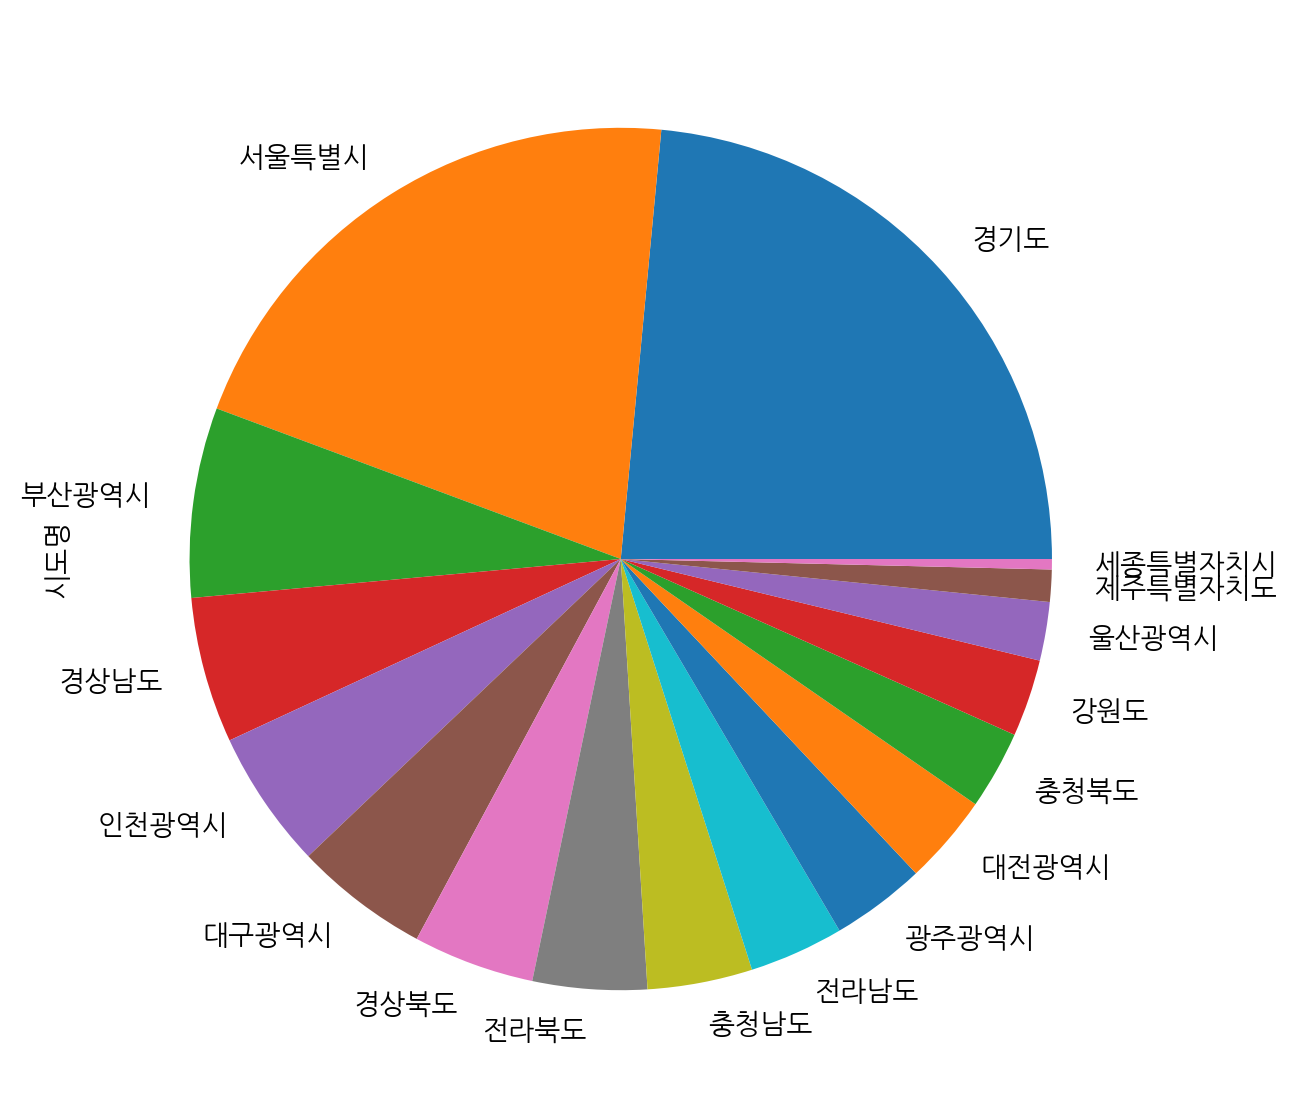

In [74]:
# 판다스의 plot.pie()를 사용해서 파이그래프를 그려보기

city_normalize.plot.pie(figsize=(7,7))

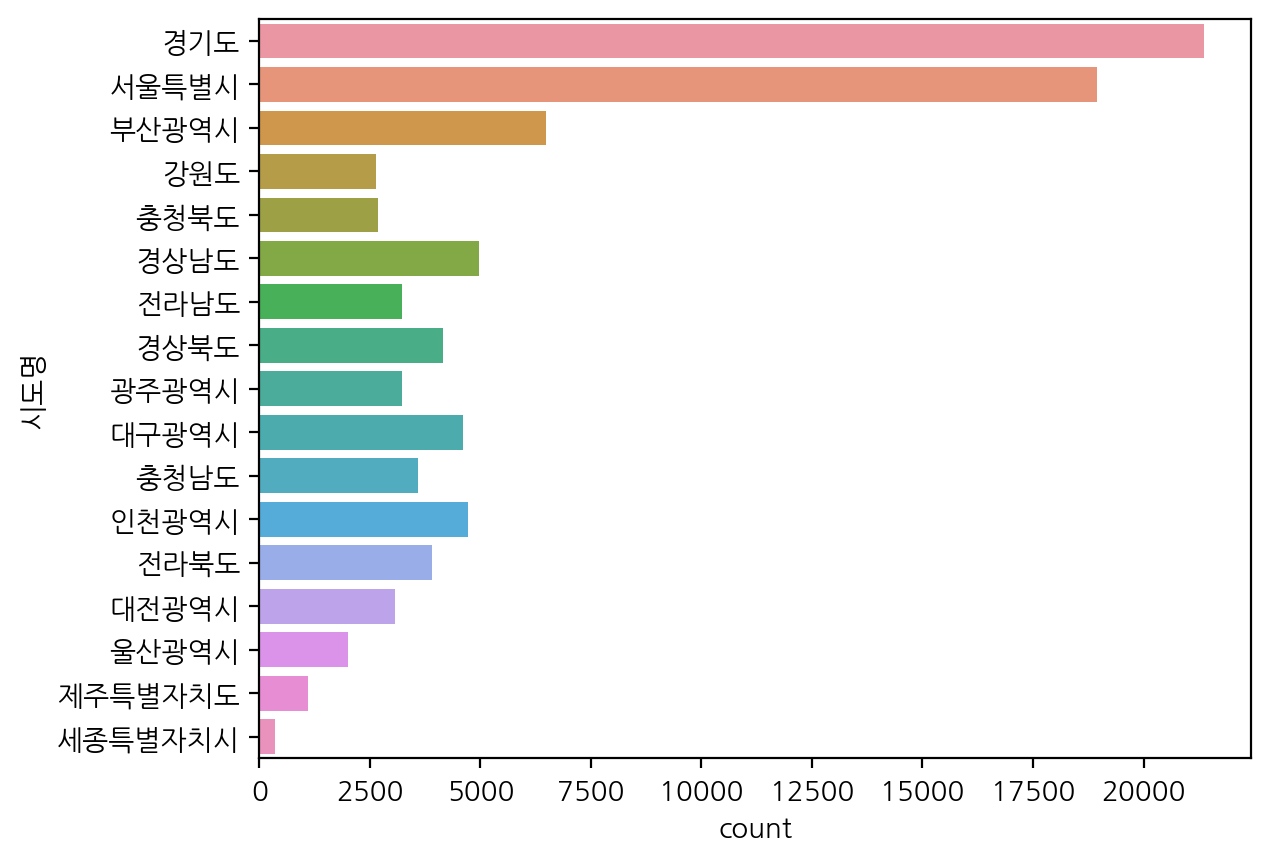

In [75]:
# seaborn의 countplot으로 그리기

c = sns.countplot(data=df,y="시도명")

In [76]:
# "상권업종대분류명"으로 갯수를 세어보자
df["상권업종대분류명"].value_counts()

의료    91335
Name: 상권업종대분류명, dtype: int64

In [77]:
# "상권업종대분류명"으로 갯수를 세어보자
a = df["상권업종중분류명"].value_counts()
a

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [78]:
# normalize=True로 비율 구하기
b = df["상권업종중분류명"].value_counts(normalize=True)
b

병원          0.665397
약국/한약방      0.229080
수의업         0.058280
유사의료업       0.041320
의료관련서비스업    0.005923
Name: 상권업종중분류명, dtype: float64

<Axes: >

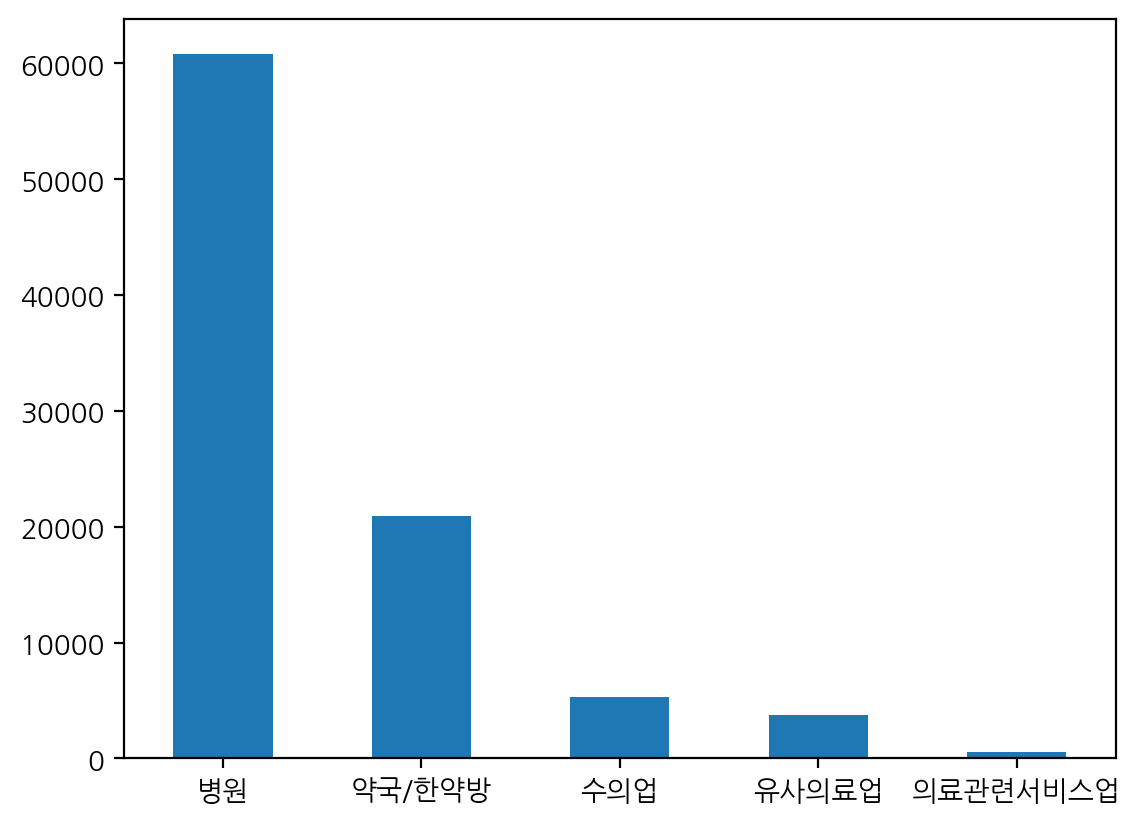

In [79]:
# 판다스의 plot.bar()를 사용
a.plot.bar(rot = 0)

# rot(rotate) : 레이블 값을 얼마나 회전할지

<Axes: ylabel='상권업종중분류명'>

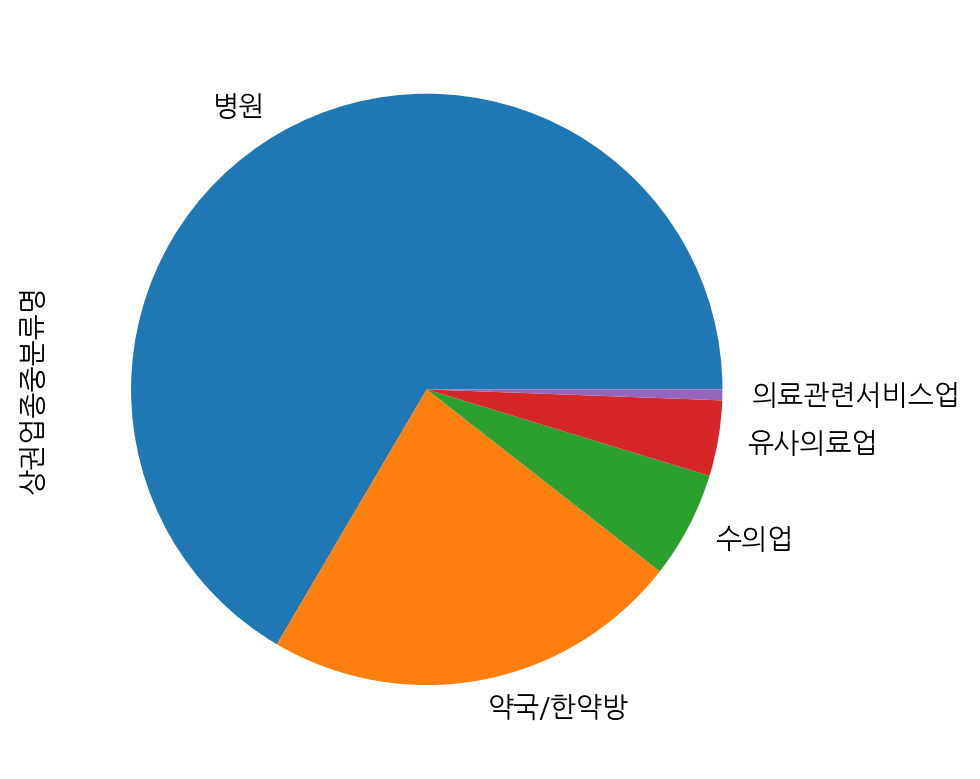

In [80]:
# piechart그리기
a.plot.pie()

In [81]:
# "상권업종소분류명"에 대한 그룹화 된 값을 카운트

sm = df["상권업종소분류명"].value_counts()
sm

약국         18964
치과의원       13731
한의원        13211
내과/외과      11374
기타병원        4922
일반병원        3385
동물병원        3098
정형/성형외과     2562
소아과         2472
수의업-종합      2216
치과기공소       1724
이비인후과의원     1486
한약방         1442
피부과         1273
산부인과        1116
노인/치매병원     1055
안과의원        1042
비뇨기과         809
종합병원         762
치과병원         756
언어치료         664
유사의료업기타      629
탕제원          517
산후조리원        511
신경외과         421
한방병원         397
척추교정치료       338
침구원          154
혈액원          130
응급구조대        125
조산원           30
접골원            9
수의업-기타         9
제대혈            1
Name: 상권업종소분류명, dtype: int64

<Axes: >

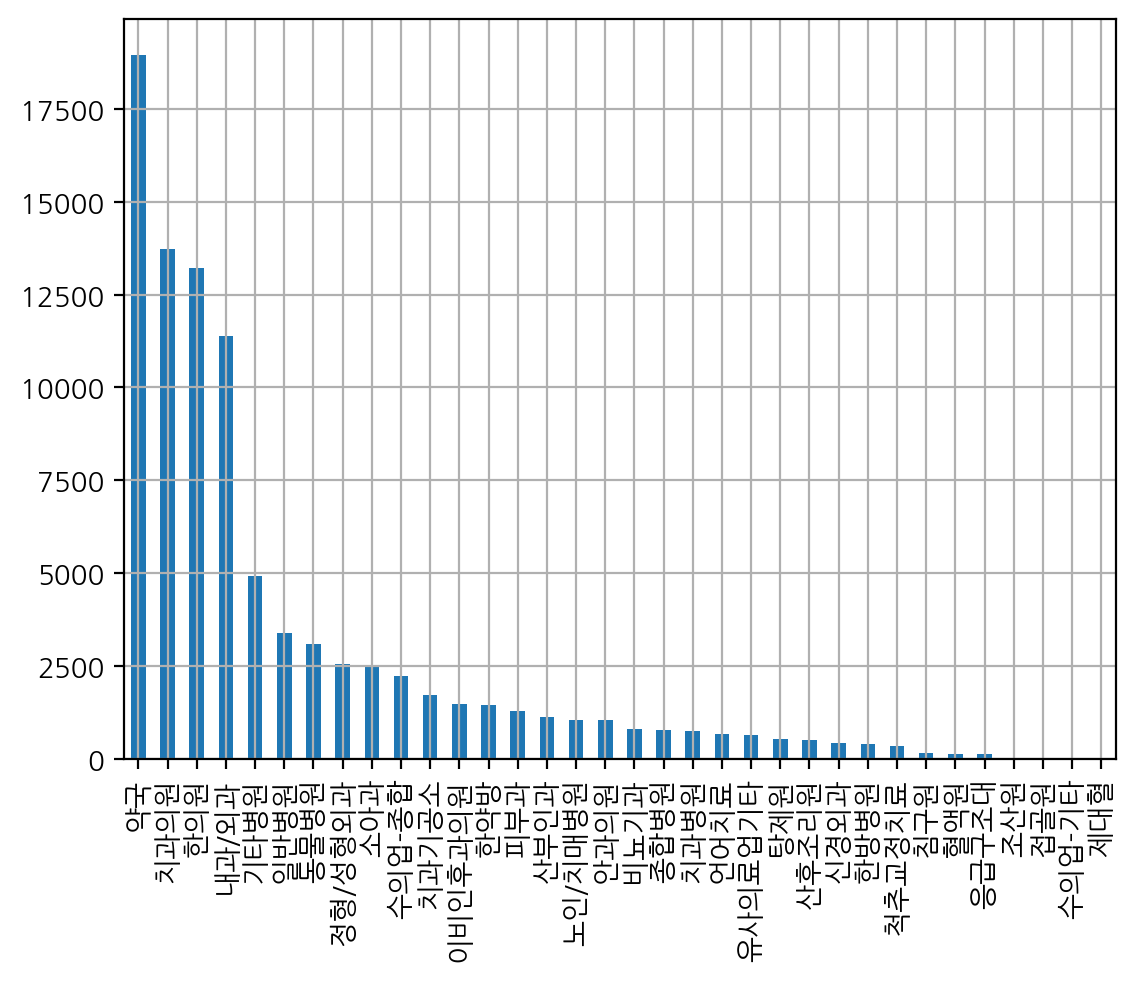

In [82]:
# "상권업종소분류명"의 갯수로 막대그래프
sm.plot.bar(grid=True)

# barh -> horizontal
# figsize=( , ) -> 그래프 사이즈
# grid=True -> 그리드 그리기

## 1.12 데이터 색인하기
- 특정 데이터만 모아서 따로 보기

In [85]:
# "상권업종중분류명" -> "약국/한약방"인 데이터만

df_medical = df[df["상권업종중분류명"] == "약국/한약방"].copy()
df_medical.head()

상가업소번호        상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
4   20364049  더블유스토어수지점         S       의료       S02   약국/한약방    S02A01   
6   20733252      춘산한약방         S       의료       S02   약국/한약방    S02A02   
7   20582210      부부탕제원         S       의료       S02   약국/한약방    S02A03   
10  21057519       민생약국         S       의료       S02   약국/한약방    S02A01   
13  21217689     제중당한약방         S       의료       S02   약국/한약방    S02A02   

   상권업종소분류명   시도명    시군구코드  ...                     지번주소         도로명코드  \
4        약국   경기도  41465.0  ...   경기도 용인시 수지구 풍덕천동 712-2  414653205024   
6       한약방   강원도  42110.0  ...         강원도 춘천시 중앙로2가 99  421104454113   
7       탕제원  충청북도  43111.0  ...  충청북도 청주시 상당구 금천동 187-17  431114508623   
10       약국  경상남도  48890.0  ...    경상남도 합천군 용주면 월평리 78-2  488904844473   
13      한약방  전라남도  46830.0  ...     전라남도 영암군 도포면 덕화리 296  468304685396   

                       도로명  건물본번지                     건물관리번호  \
4          경기도 용인시 수지구 문정로     32  4146510100107120002026238   
6              강원도 춘천시 낙원길     50  4211010500101000000023668   
7   충청북도 청주시 상당구 중고개로337번길    134  4311112000101870017042942   
10        경상남도 합천군 용주면 월평길    149  4889046030200780002048274   
13        전라남도 영암군 도포면 인덕길     75  4683035023102960000000001   

                         도로명주소     구우편번호    신우편번호          경도         위도  
4           경기도 용인시 수지구 문정로 32  448170.0  16837.0  127.095522  37.323528  
6               강원도 춘천시 낙원길 50  200042.0  24273.0  127.726905  37.880504  
7   충청북도 청주시 상당구 중고개로337번길 134  360802.0  28726.0  127.499206  36.625355  
10     경상남도 합천군 용주면 월평길 149-35  678912.0  50212.0  128.118615  35.575962  
13      전라남도 영암군 도포면 인덕길 75-10  526832.0  58429.0  126.630348  34.834080  

[5 rows x 29 columns]

In [88]:
m = df["상권업종대분류명"] =="의료"
df.loc[m,"상권업종중분류명"].value_counts()

병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: 상권업종중분류명, dtype: int64

In [91]:
df_medi = df[df["상권업종중분류명"] =="유사의료업"]
df_medi.shape
# df로 감싸서 true인 애들만 모음
# (행,)

(3774, 29)

In [92]:
df["상호명"].value_counts().head(10)

리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: 상호명, dtype: int64

In [93]:
df_medi["상호명"].value_counts().head()

리원         32
고려수지침      22
대한적십자사     17
헌혈의집       12
고려수지침학회    10
Name: 상호명, dtype: int64

### 1.12.1 여러 조건으로 색인하기

In [101]:
df_seoul_dr = df[(df["상권업종소분류명"] == "약국" )&( df["시도명"] =="서울특별시")]
df_seoul_dr
print(df_seoul_dr.shape)

# 위에 줄도 출력 print

df_seoul_dr.head()


(3579, 29)


상가업소번호      상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
33   20816709    이즈타워약         S       의료       S02   약국/한약방    S02A01   
51   20855710     진흥약국         S       의료       S02   약국/한약방    S02A01   
130  21589838    신세계약국         S       의료       S02   약국/한약방    S02A01   
136  22388303  메디팜한솔약국         S       의료       S02   약국/한약방    S02A01   
141  22412563      명약국         S       의료       S02   약국/한약방    S02A01   

    상권업종소분류명    시도명    시군구코드  ...                    지번주소         도로명코드  \
33        약국  서울특별시  11680.0  ...       서울특별시 강남구 역삼동 821  116803122010   
51        약국  서울특별시  11740.0  ...       서울특별시 강동구 둔촌동 630  117403124002   
130       약국  서울특별시  11260.0  ...       서울특별시 중랑구 신내동 646  112603106007   
136       약국  서울특별시  11200.0  ...       서울특별시 성동구 행당동 346  112003103006   
141       약국  서울특별시  11230.0  ...  서울특별시 동대문구 휘경동 286-121  112304115120   

                    도로명  건물본번지                     건물관리번호  \
33       서울특별시 강남구 테헤란로    101  1168010100108210001000001   
51        서울특별시 강동구 명일로    172  1174010600106090000000001   
130       서울특별시 중랑구 신내로    211  1126010600106460000000300   
136       서울특별시 성동구 행당로     82  1120010700103460012016935   
141  서울특별시 동대문구 망우로18나길      3  1123010900102860121007257   

                    도로명주소     구우편번호   신우편번호          경도         위도  
33     서울특별시 강남구 테헤란로 101  135080.0  6134.0  127.028023  37.498656  
51      서울특별시 강동구 명일로 172  134767.0  5360.0  127.145055  37.534135  
130     서울특별시 중랑구 신내로 211  131130.0  2024.0  127.092597  37.616424  
136      서울특별시 성동구 행당로 82  133777.0  4717.0  127.027513  37.556238  
141  서울특별시 동대문구 망우로18나길 3  130090.0  2498.0  127.060556  37.587349  

[5 rows x 29 columns]

### 1.12.2 구별로 보기

In [105]:
# 시군구명으로 그룹화 해서 갯수를 세어보기

c = df_seoul_dr["시군구명"].value_counts()
c.head()

강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
Name: 시군구명, dtype: int64

In [109]:
# normalize=True 비율
c = df_seoul_dr["시군구명"].value_counts(normalize = True)
c.head()

강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
Name: 시군구명, dtype: float64

<Axes: >

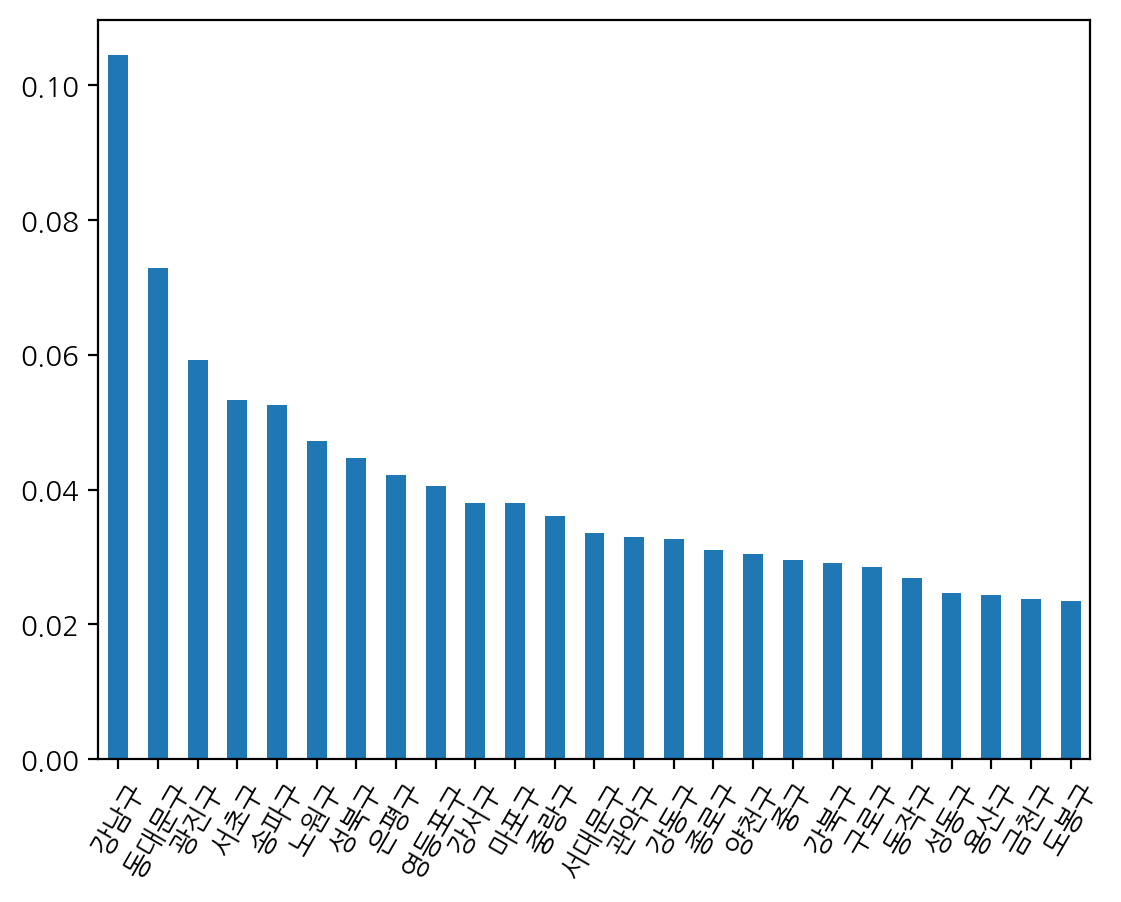

In [110]:
c.plot.bar(rot = 60)

In [116]:
# 서울특별시 종합병원

df_seoul_hospital = df[(df["상권업종소분류명"] == "종합병원") & (df["시도명"]=="서울특별시")].copy()
df_seoul_hospital


상가업소번호               상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
305    25155642            대진의료재단         S       의료       S01       병원   
353    20471487            홍익병원별관         S       의료       S01       병원   
385    20737057              SNUH         S       의료       S01       병원   
1917   23210677  평화드림여의도성모병원의료기매장         S       의료       S01       병원   
2461   20024045                한양         S       의료       S01       병원   
...         ...               ...       ...      ...       ...      ...   
71991  28505952      서울성모병원응급의료센터         S       의료       S01       병원   
76508  12292992             라마르의원         S       의료       S01       병원   
90492  16031909     가톨릭대학교여의도성모병원         S       의료       S01       병원   
90581  16332576              씨엠병원         S       의료       S01       병원   
90788  16162338            성베드로병원         S       의료       S01       병원   

      상권업종소분류코드 상권업종소분류명    시도명    시군구코드  ...                  지번주소  \
305      S01B01     종합병원  서울특별시  11215.0  ...   서울특별시 광진구 중곡동 58-25   
353      S01B01     종합병원  서울특별시  11470.0  ...  서울특별시 양천구 신정동 897-13   
385      S01B01     종합병원  서울특별시  11680.0  ...  서울특별시 강남구 역삼동 736-55   
1917     S01B01     종합병원  서울특별시  11560.0  ...    서울특별시 영등포구 여의도동 62   
2461     S01B01     종합병원  서울특별시  11200.0  ...    서울특별시 성동구 행당동 15-1   
...         ...      ...    ...      ...  ...                   ...   
71991    S01B01     종합병원  서울특별시  11650.0  ...     서울특별시 서초구 반포동 505   
76508    S01B01     종합병원  서울특별시  11740.0  ...   서울특별시 강동구 천호동 453-8   
90492    S01B01     종합병원  서울특별시  11140.0  ...     서울특별시 중구 명동2가 1-1   
90581    S01B01     종합병원  서울특별시  11560.0  ...  서울특별시 영등포구 영등포동4가 90   
90788    S01B01     종합병원  서울특별시  11680.0  ...  서울특별시 강남구 도곡동 910-27   

              도로명코드                 도로명  건물본번지                     건물관리번호  \
305    112153104006      서울특별시 광진구 긴고랑로    119  1121510100100580025000733   
353    114702005008      서울특별시 양천구 국회대로    250  1147010100108970013001044   
385    116804166727   서울특별시 강남구 테헤란로26길     10  1168010100107360055027688   
1917   115603118001      서울특별시 영등포구 63로     10  1156011000100620000031477   
2461   112003103002       서울특별시 성동구 마조로     22  1120010700100150001019623   
...             ...                 ...    ...                        ...   
71991  116502121003      서울특별시 서초구 반포대로    222  1165010700101230000017226   
76508  117404172367  서울특별시 강동구 천호대로157길     18  1174010900104530021010314   
90492  111404103165        서울특별시 중구 명동길     74  1114012700100010001019574   
90581  115604154717  서울특별시 영등포구 영등포로36길     13  1156010500100900000035097   
90788  116802000003     서울특별시 강남구 남부순환로   2649  1168011800109100027000895   

                       도로명주소     구우편번호   신우편번호          경도         위도  
305       서울특별시 광진구 긴고랑로 119  143220.0  4944.0  127.088279  37.559048  
353       서울특별시 양천구 국회대로 250  158070.0  7937.0  126.862805  37.529213  
385     서울특별시 강남구 테헤란로26길 10  135080.0  6236.0  127.035825  37.499630  
1917       서울특별시 영등포구 63로 10  150713.0  7345.0  126.936693  37.518296  
2461      서울특별시 성동구 마조로 22-2  133070.0  4763.0  127.041325  37.559469  
...                      ...       ...     ...         ...        ...  
71991     서울특별시 서초구 반포대로 222  137701.0  6591.0  127.005841  37.502382  
76508  서울특별시 강동구 천호대로157길 18  134864.0  5335.0  127.127466  37.538485  
90492        서울특별시 중구 명동길 74  100809.0  4537.0  126.986758  37.563662  
90581  서울특별시 영등포구 영등포로36길 13  150030.0  7301.0  126.903857  37.518807  
90788   서울특별시 강남구 남부순환로 2649  135859.0  6271.0  127.039567  37.485604  

[91 rows x 29 columns]

In [117]:
df_seoul_hospital["시군구명"].value_counts()

강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: 시군구명, dtype: int64

### 1.12.3 텍스트 데이터 색인하기

In [123]:
# 종합병원이 아닌 데이터 찾기
df_seoul_hospital.loc[~df_seoul_hospital["상호명"].str.contains("종합병원"),"상호명"].unique()

# str.contains() -> 포함하는 값

array(['대진의료재단', '홍익병원별관', 'SNUH', '평화드림여의도성모병원의료기매장', '한양', '백산의료재단친구병원',
       '서울보훈병원', '서울성모병원장례식장꽃배달', '서울대학교병원', '알콜중독및정신질환상담소',
       '강남성모병원장례식장꽃배달', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '국민의원', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '수서제일의원', '사랑의의원', '한국전력공사부속한일병원', '신촌연세병원', '창동제일의원',
       '영동세브란스병원', '제일성심의원', '삼성의료재단강북삼성태', '서울시립보라매병원', '서울이의원',
       '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서', '독일의원',
       '서울연합의원', '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원',
       '메디힐특수여객', '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특',
       '정해복지부설한신메디피아', '성베드로병원', '성애의료재단', '실로암의원', 'Y&T성모마취과', '광진성모의원',
       '서울현대의원', '이노신경과의원', '송정훼밀리의원', '서울중앙의원', '영남의료재단', '인제대학교서울백병원',
       '한국필의료재단', '세브란스의원', '가톨릭대학교성바오로병원장례식장', '서울연세의원', '사랑의병원',
       '성삼의료재단미즈메디병원', '씨엠충무병원', '성신의원', '원진재단부설녹색병원', '송파제일의원',
       '카톨릭성모의원', '한양성심의원', '관악

In [125]:
# 상호명에서 특정 단어가 들어가는 데이터만 가져오기 - 꽃배

df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달")]

상가업소번호            상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
2803  20895655  서울성모병원장례식장꽃배달         S       의료       S01       병원    S01B01   
4644  22020310  강남성모병원장례식장꽃배달         S       의료       S01       병원    S01B01   

     상권업종소분류명    시도명    시군구코드  ...                 지번주소         도로명코드  \
2803     종합병원  서울특별시  11650.0  ...    서울특별시 서초구 반포동 551  116504163330   
4644     종합병원  서울특별시  11650.0  ...  서울특별시 서초구 반포동 547-6  116504163242   

                    도로명  건물본번지                     건물관리번호  \
2803  서울특별시 서초구 사평대로28길     55  1165010700105510000017194   
4644  서울특별시 서초구 반포대로39길     56  1165010700105470006016762   

                        도로명주소     구우편번호   신우편번호          경도         위도  
2803     서울특별시 서초구 사평대로28길 55  137040.0  6578.0  127.000682  37.498257  
4644  서울특별시 서초구 반포대로39길 56-24  137040.0  6578.0  127.001756  37.499095  

[2 rows x 29 columns]

In [126]:
df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("의료기")]

상가업소번호               상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
1917  23210677  평화드림여의도성모병원의료기매장         S       의료       S01       병원   

     상권업종소분류코드 상권업종소분류명    시도명    시군구코드  ...                지번주소  \
1917    S01B01     종합병원  서울특별시  11560.0  ...  서울특별시 영등포구 여의도동 62   

             도로명코드             도로명  건물본번지                     건물관리번호  \
1917  115603118001  서울특별시 영등포구 63로     10  1156011000100620000031477   

                  도로명주소     구우편번호   신우편번호          경도         위도  
1917  서울특별시 영등포구 63로 10  150713.0  7345.0  126.936693  37.518296  

[1 rows x 29 columns]

In [130]:
# 꽃배달 의료기 장례식장 상담소 어린이집처럼 무관하기 때문에
# 전처리를 위해 해당 텍스트 한 번에 검색


drop_row = df_seoul_hospital[df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례시작|상담소|어린이집")].index
drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 60645]

In [133]:
# str.endswith -> ~~ 로 끝
drop_row2 =df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith("의원")].index
drop_row2 = drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [151]:
drop_row = drop_row + drop_row2
len(drop_row)


125

In [143]:
# 해당 셀을 삭제(행을 기준으로)
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis=0)

print(df_seoul_hospital.shape)

(62, 29)
(62, 29)


<Axes: >

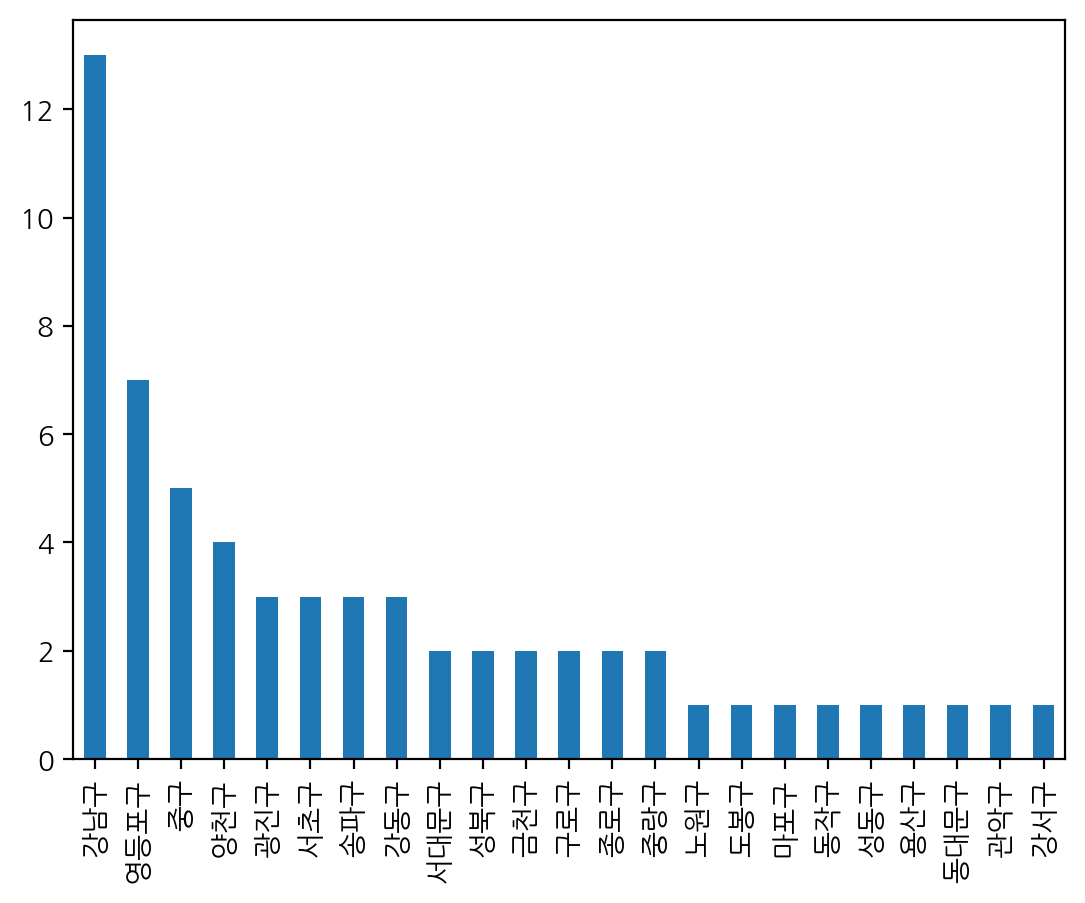

In [145]:
df_seoul_hospital["시군구명"].value_counts().plot.bar()

<Axes: xlabel='시군구명', ylabel='count'>

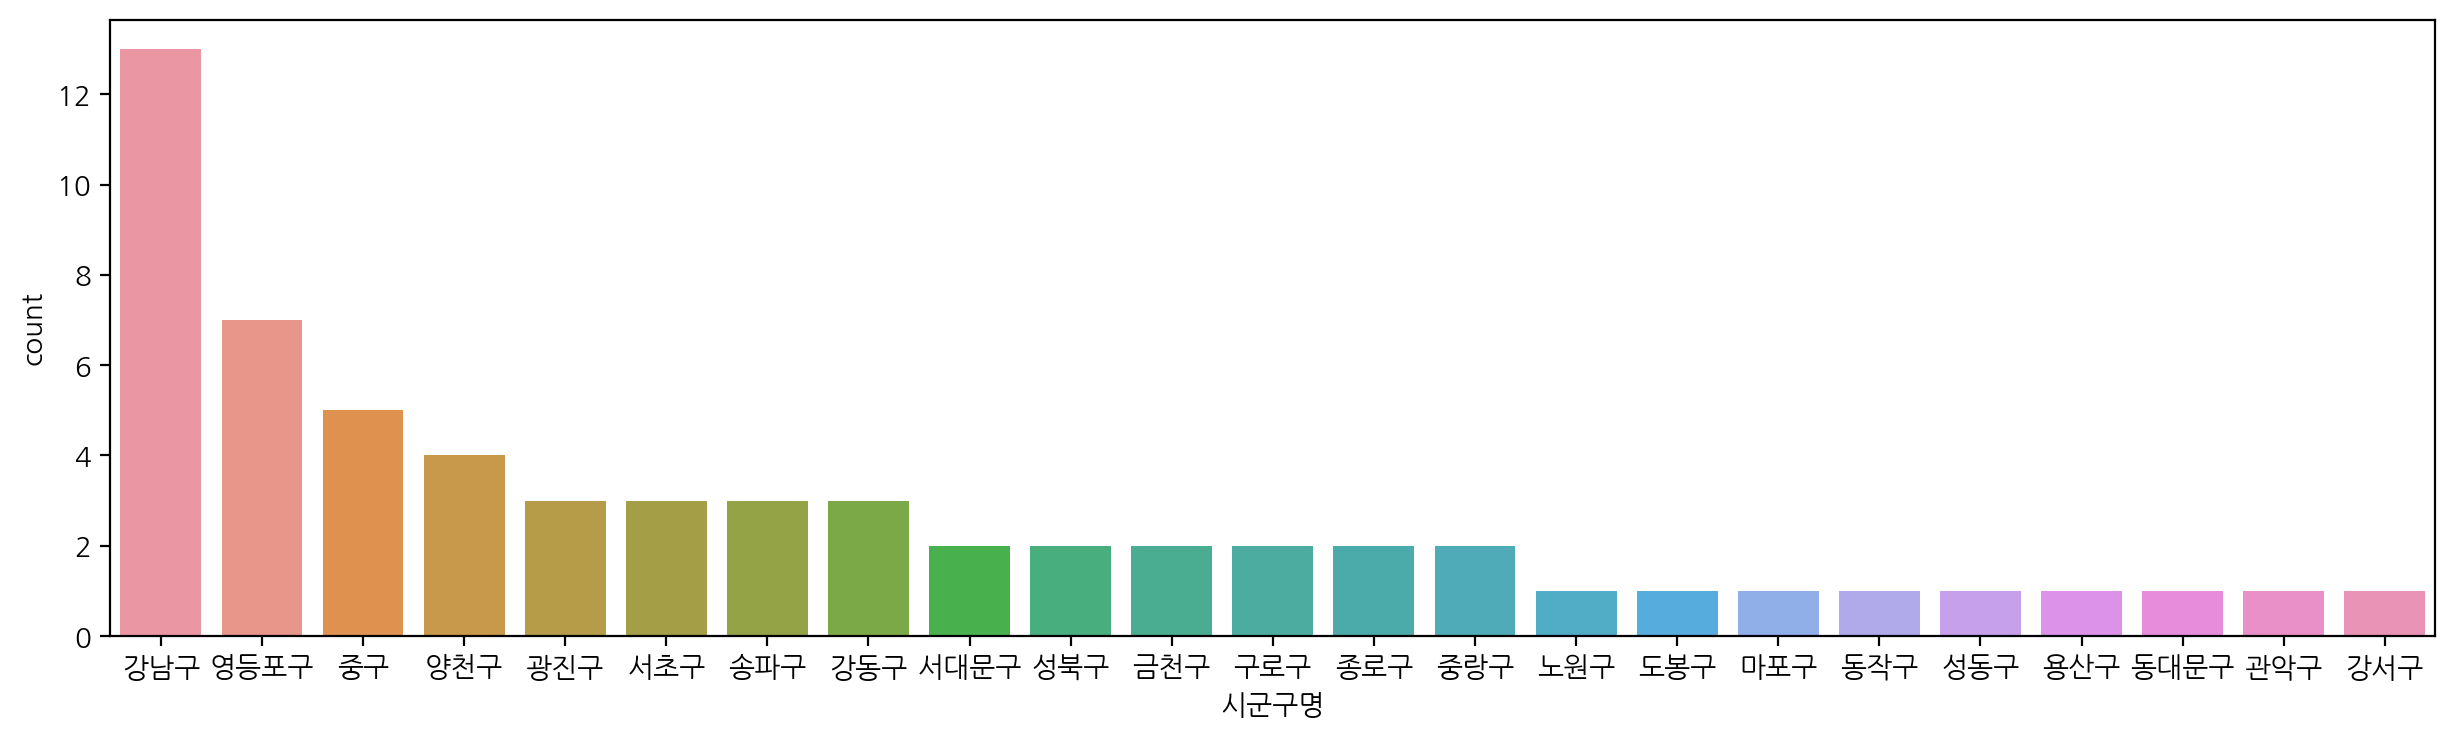

In [148]:
plt.figure(figsize=(15,4))
sns.countplot(data= df_seoul_hospital,x="시군구명",order=df_seoul_hospital["시군구명"].value_counts().index)

In [152]:
df_seoul_hospital["상호명"].unique()

array(['대진의료재단', '홍익병원별관', 'SNUH', '한양', '백산의료재단친구병원', '서울보훈병원',
       '서울대학교병원', '제일병원', '이랜드클리닉', '사랑나눔의료재단', '우울증센터', '성심의료재단',
       '다나의료재단', '서울아산병원신관', '원자력병원장례식장', '고려대학교구로병원', '학교법인일송학원',
       '삼성의료원장례식장', '희명스포츠의학센터인공신장실', '연세대학교의과대학강남세브란스', '국립정신병원',
       '코아클리닉', '한국전력공사부속한일병원', '신촌연세병원', '영동세브란스병원', '삼성의료재단강북삼성태',
       '서울시립보라매병원', '서울대학교병원비상계획외래', '평화드림서울성모병원의료', '홍익병원', '사랑나눔의료재단서',
       '우신향병원', '동부제일병원', '아산재단금강병원', '명곡안연구소', '아산재단서울중앙병원', '메디힐특수여객',
       '삼성생명공익재단삼성서', '성광의료재단차병원', '한국건강관리협회서울특', '정해복지부설한신메디피아',
       '성베드로병원', '성애의료재단', 'Y&T성모마취과', '영남의료재단', '인제대학교서울백병원', '한국필의료재단',
       '가톨릭대학교성바오로병원장례식장', '사랑의병원', '성삼의료재단미즈메디병원', '씨엠충무병원',
       '원진재단부설녹색병원', '강남센트럴병원', '우리들병원', '건국대학교병원', '서울적십자병원',
       '한림대학교부속한강성심병원장례식장', '서울성모병원응급의료센터', '가톨릭대학교여의도성모병원', '씨엠병원'],
      dtype=object)

### 1.12.4 특정 지역만 보기

In [156]:
# 위도와 경도를 보기

df_seoul = df[df["시도명"] =="서울특별시"].copy()
df_seoul.shape

(18943, 29)

<Axes: >

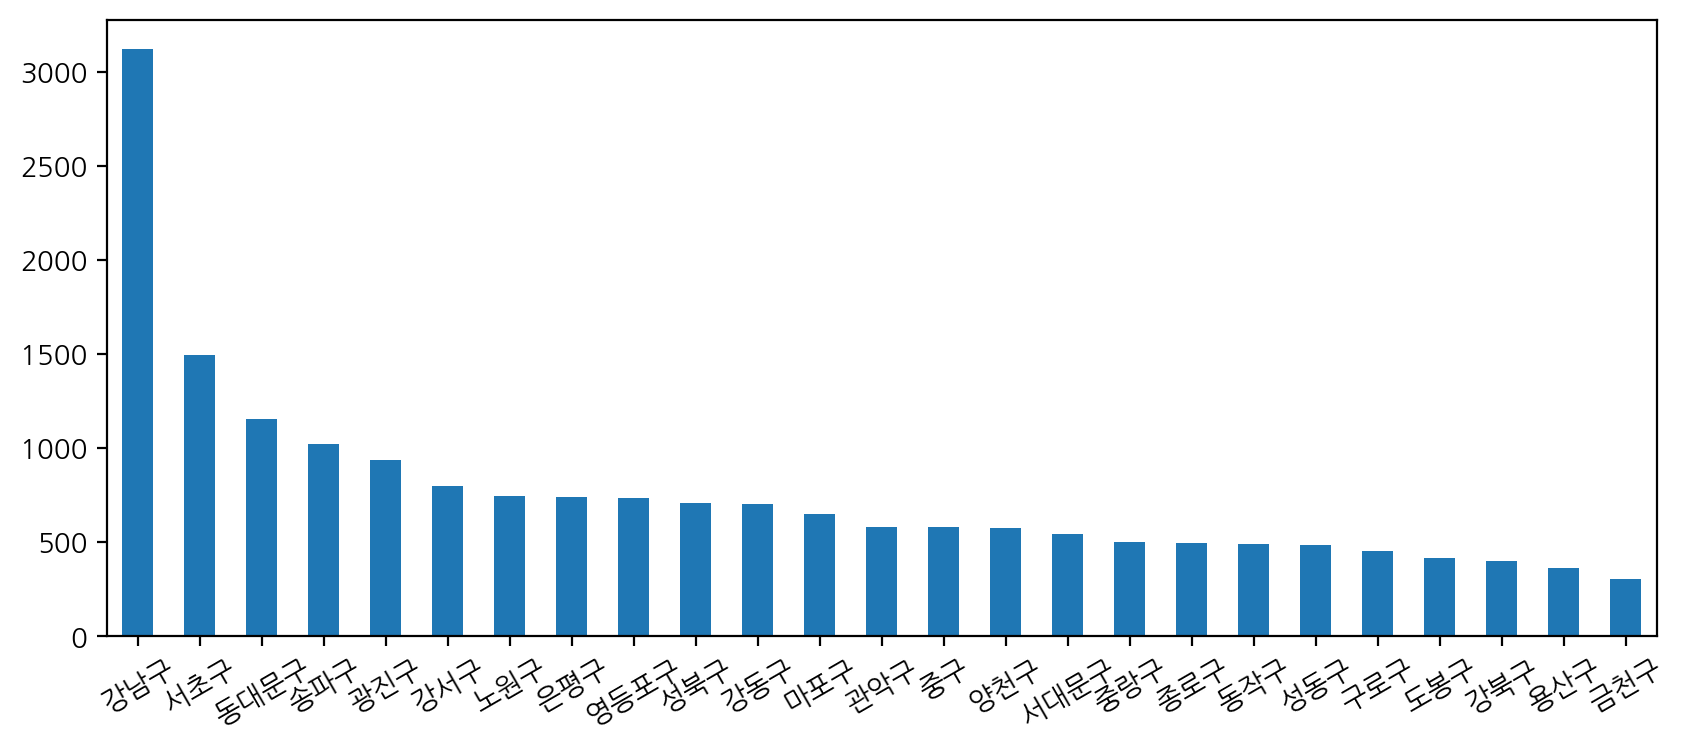

In [163]:
# seaborn의 countplot을 사용해서 만들기
# rot = 기울기값

df_seoul["시군구명"].value_counts().plot.bar(figsize = (10,4),rot=30)

<Axes: xlabel='시군구명', ylabel='count'>

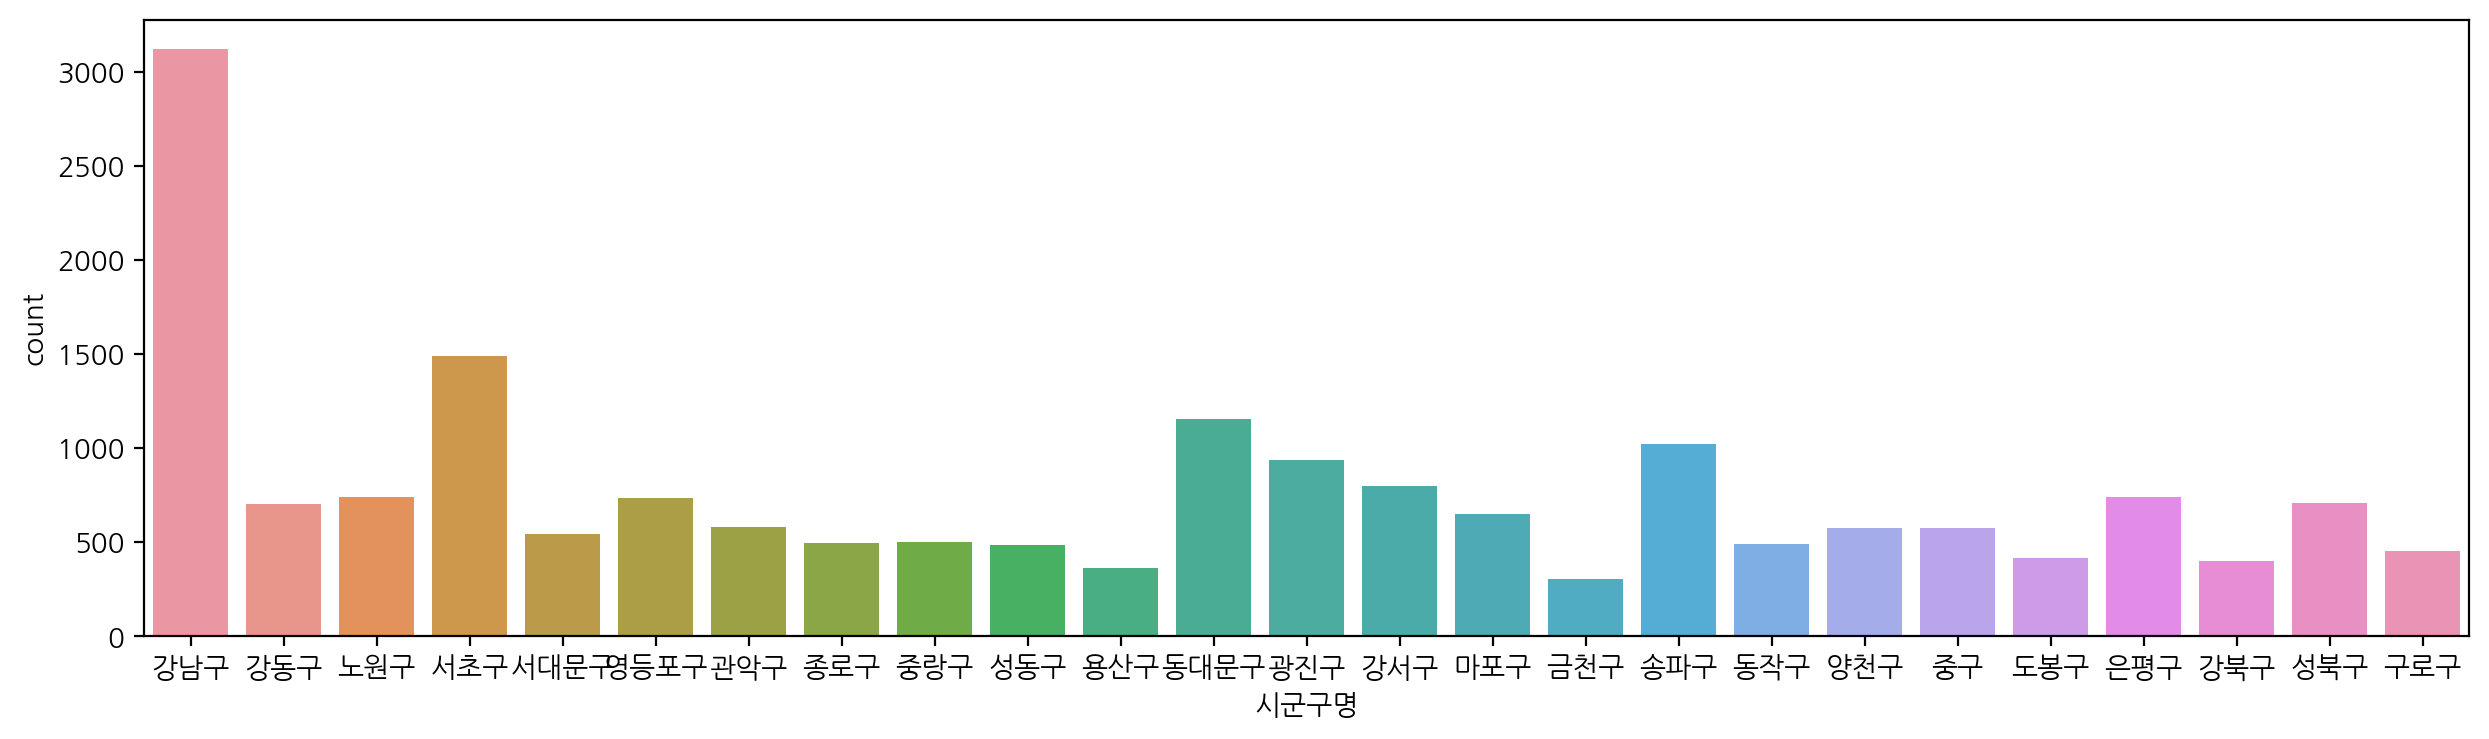

In [165]:
plt.figure(figsize=(15,4))
sns.countplot(data = df_seoul, x="시군구명")

<Axes: xlabel='경도', ylabel='위도'>

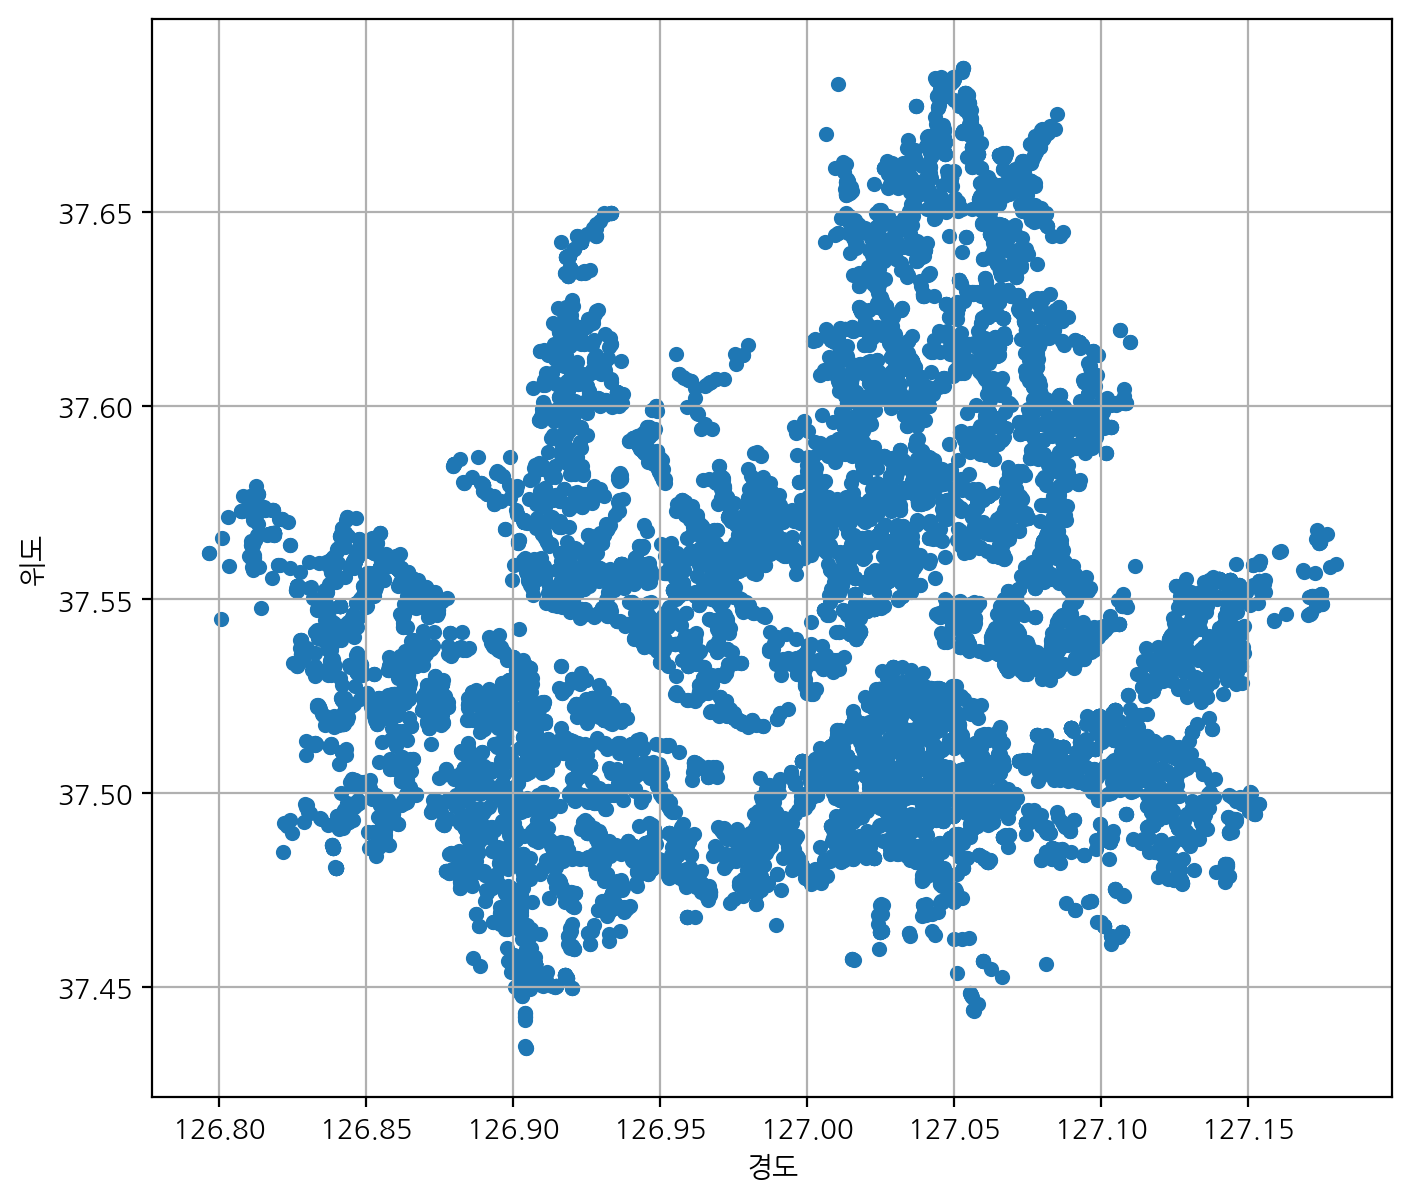

In [170]:
# plot.scatter를 통해 경도와 위도 표시

df_seoul[["경도","위도","시군구명"]].plot.scatter(x="경도",y= "위도",figsize=(8,7),grid=True)

<Axes: xlabel='경도', ylabel='위도'>

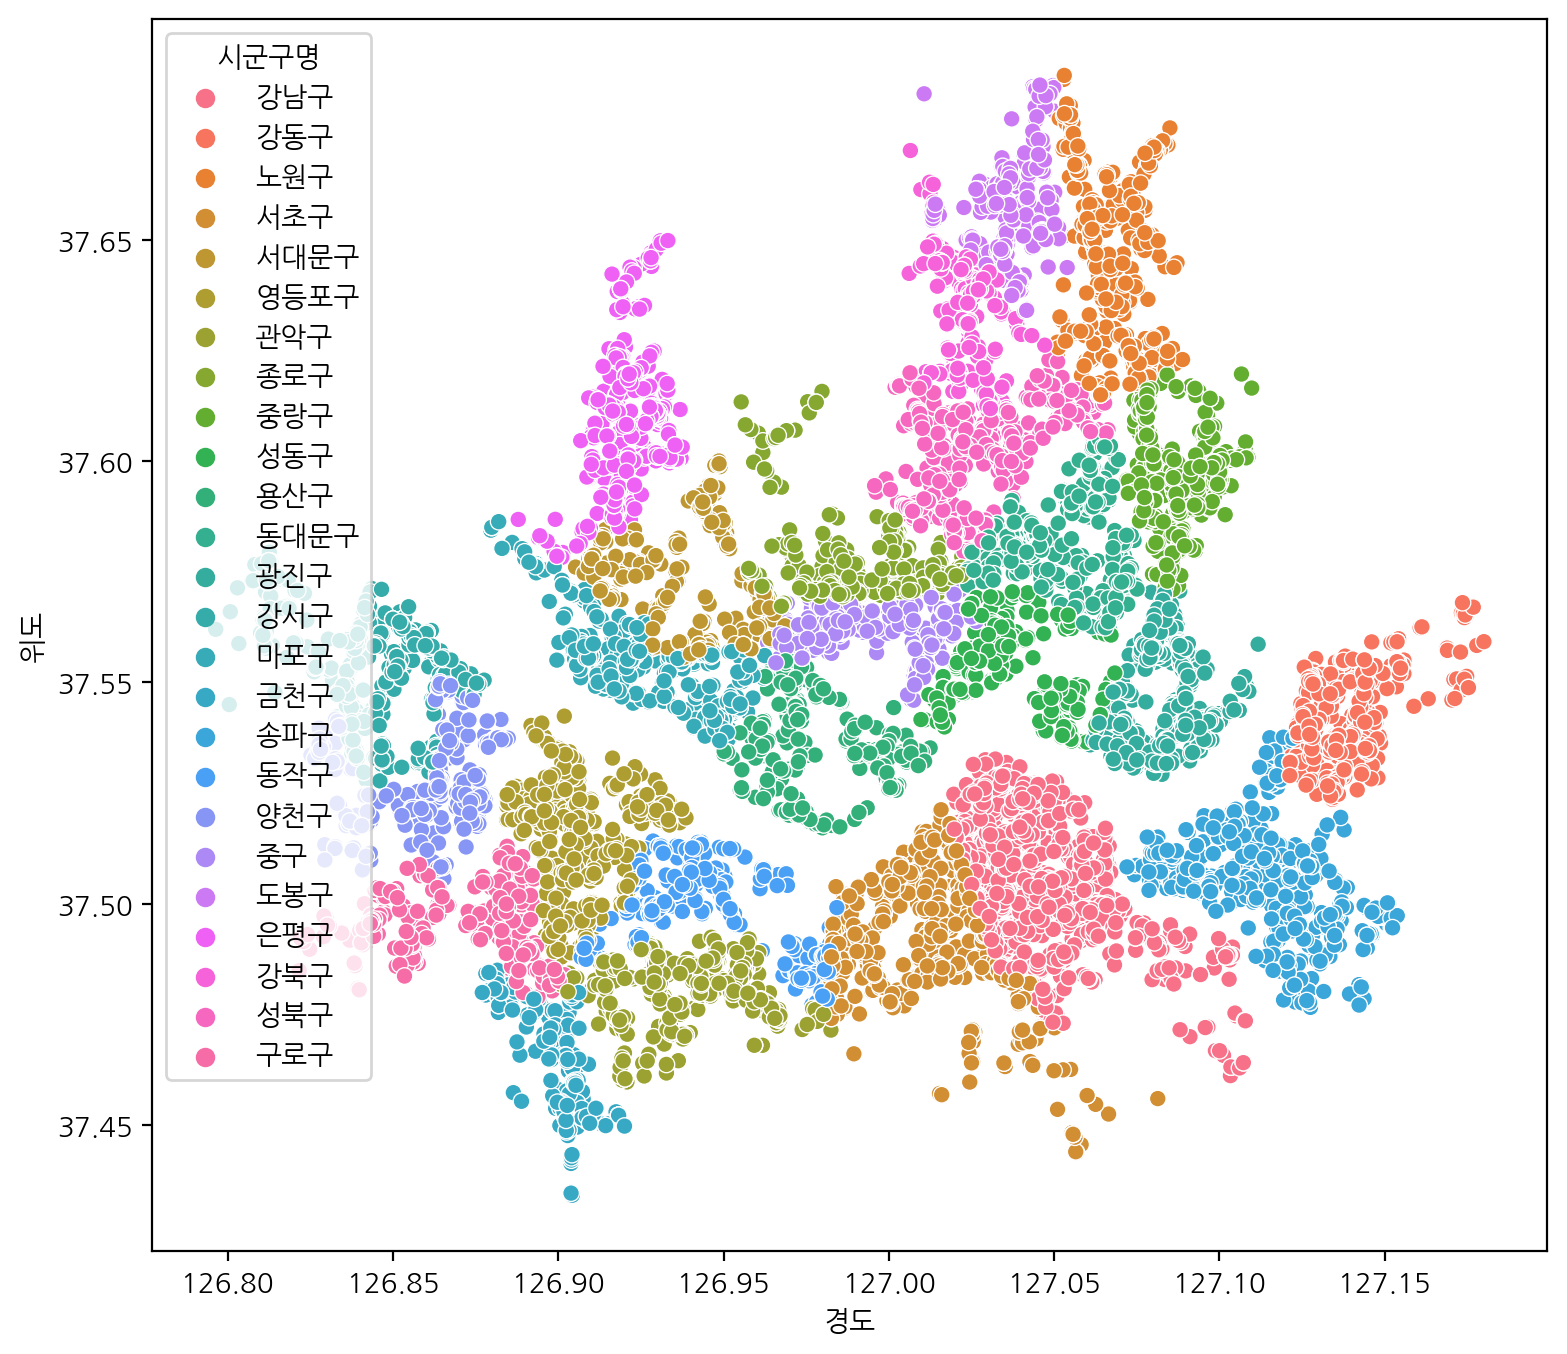

In [173]:
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_seoul,x="경도",y="위도", hue="시군구명")
# hue = 색상 다르게 표시

<Axes: xlabel='경도', ylabel='위도'>

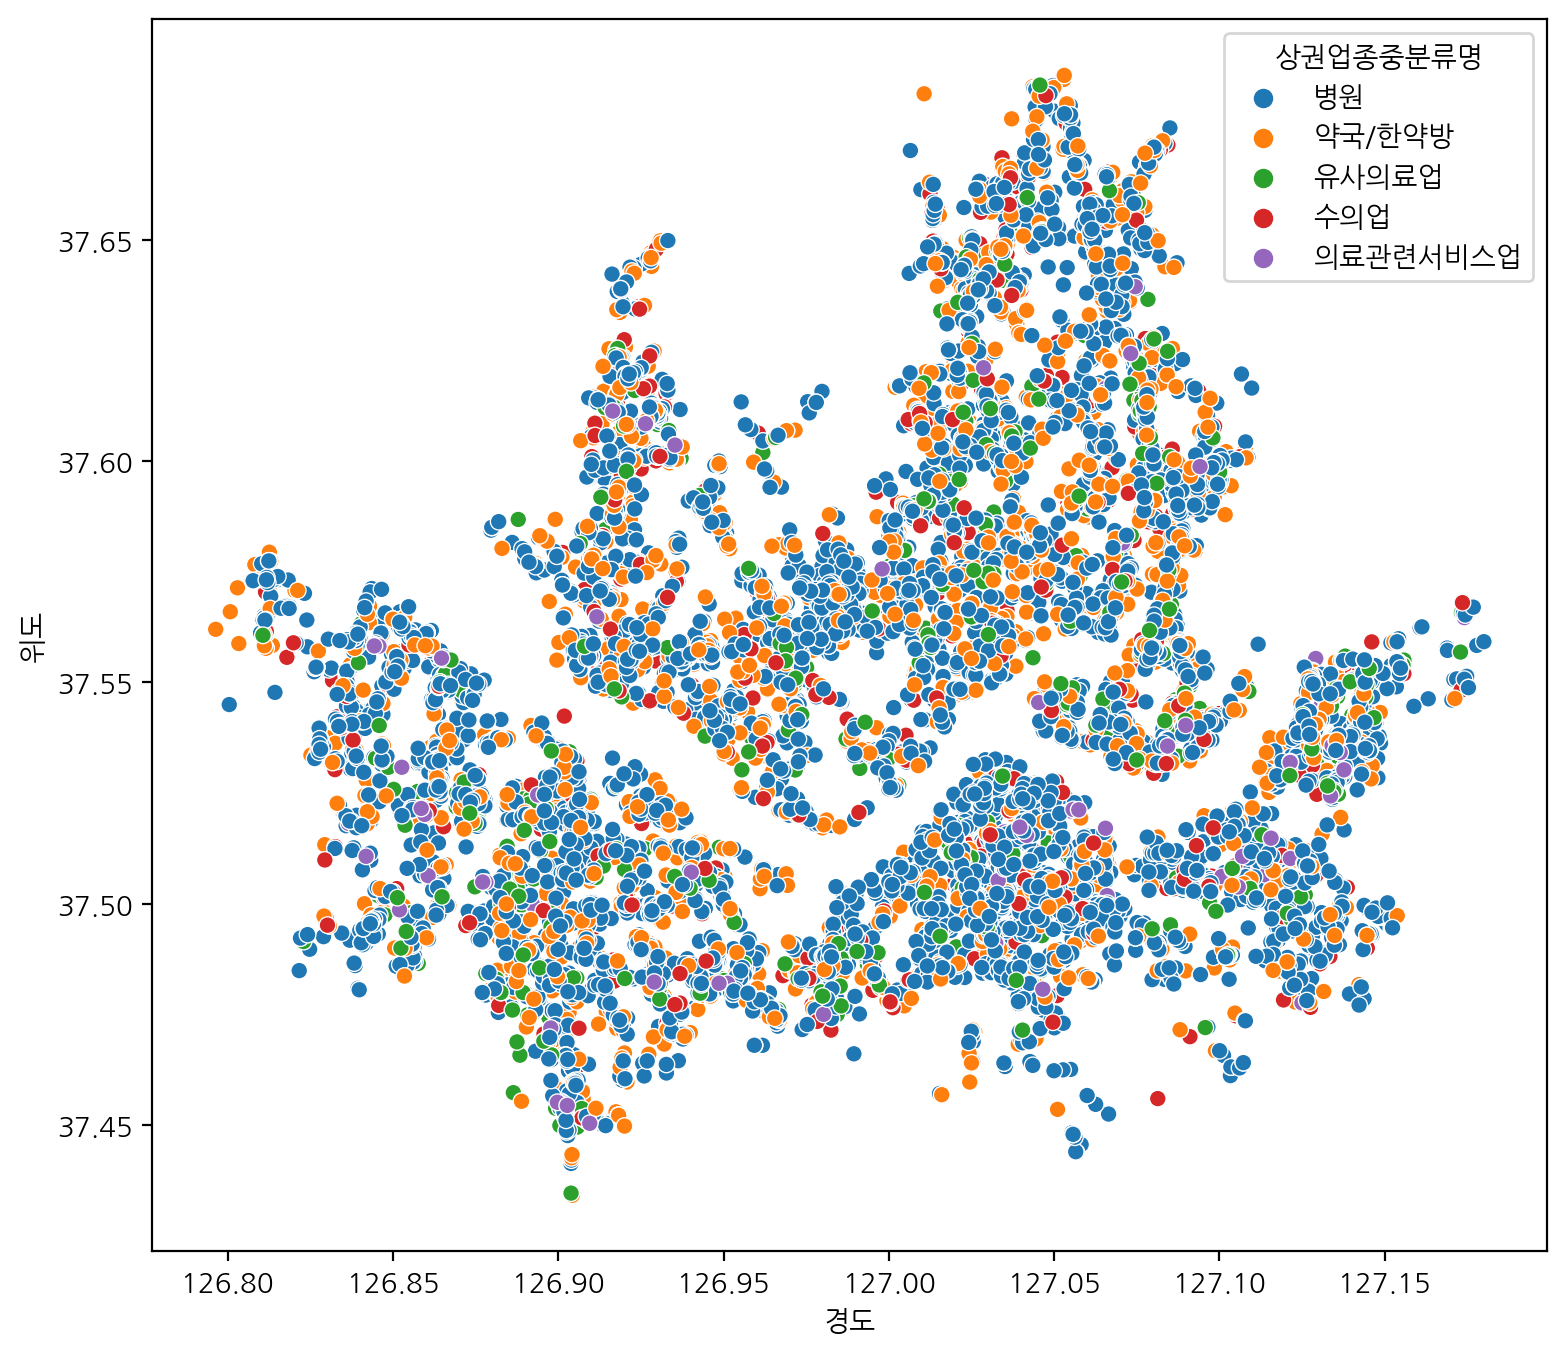

In [174]:
plt.figure(figsize=(9,8))
sns.scatterplot(data=df_seoul,x="경도",y="위도", hue="상권업종중분류명")

<Axes: xlabel='경도', ylabel='위도'>

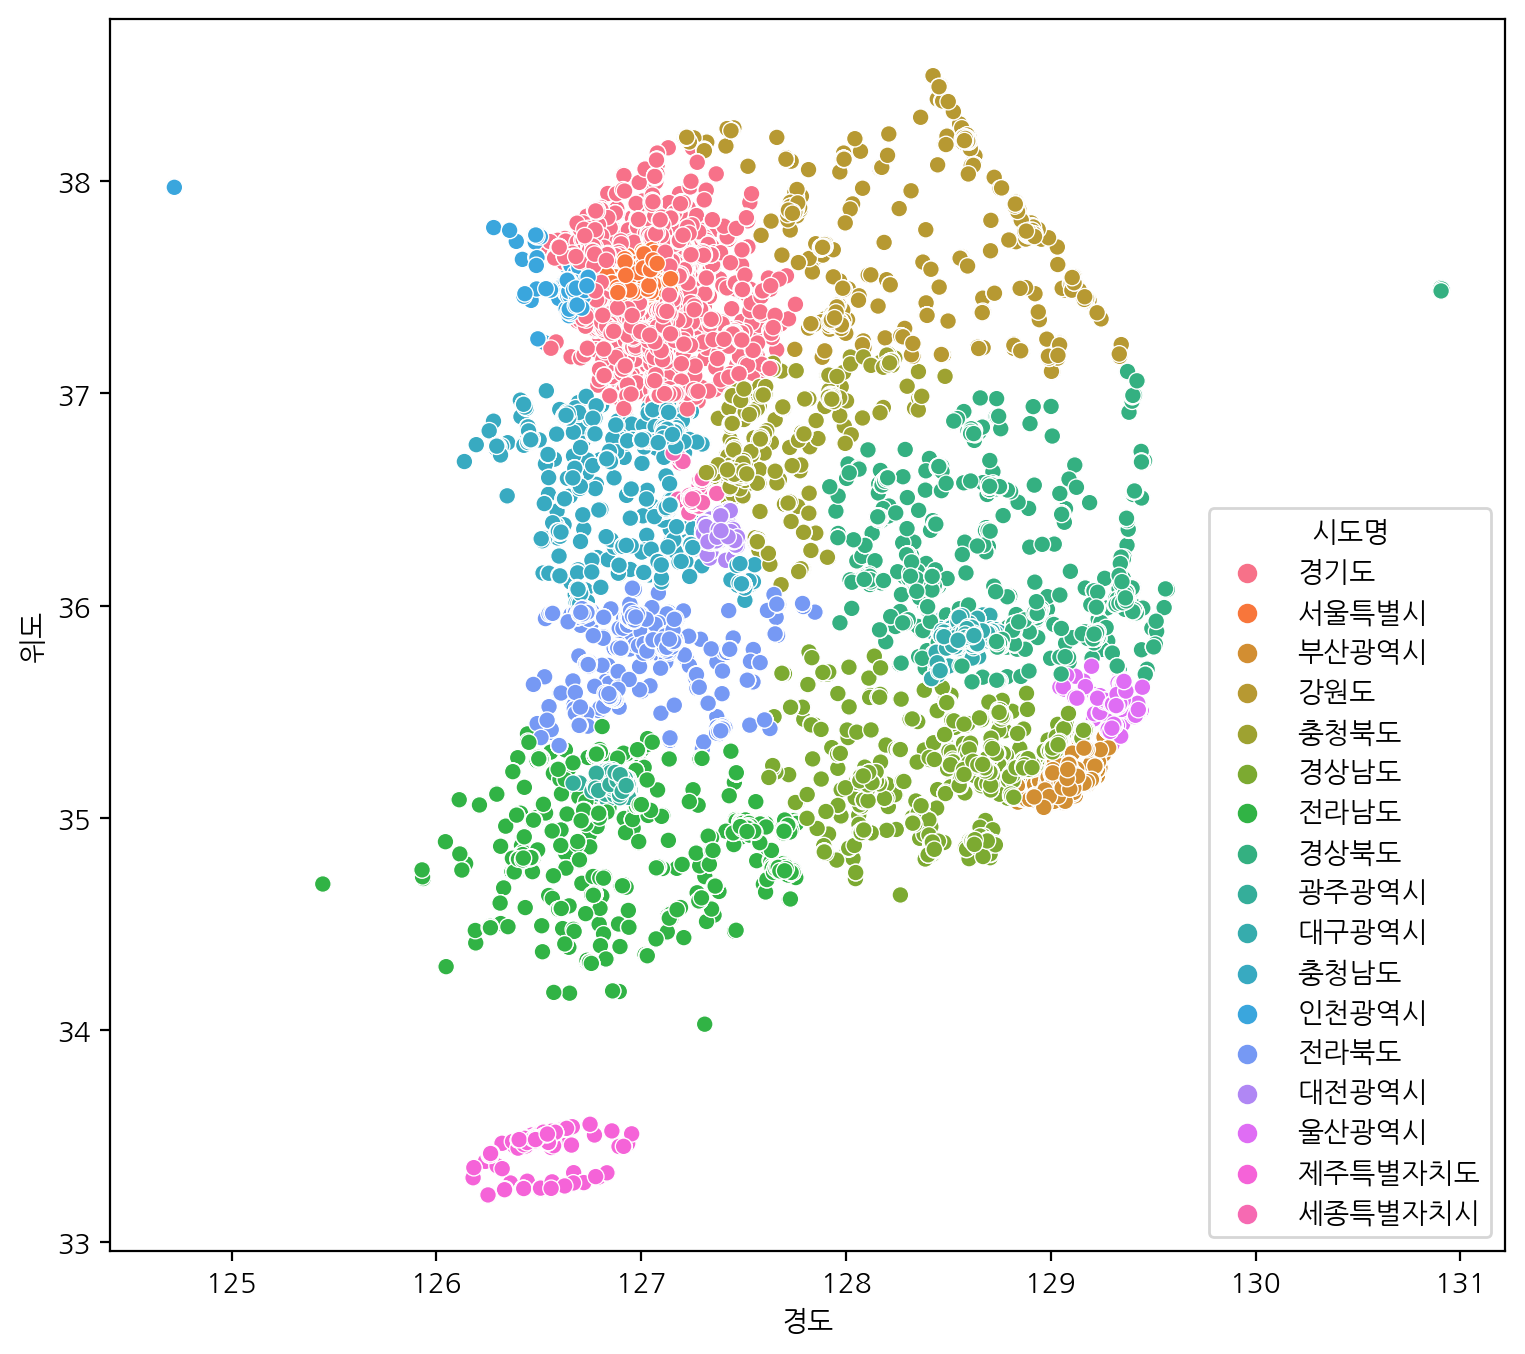

In [177]:
plt.figure(figsize=(9,8))
sns.scatterplot(data=df,x="경도",y="위도", hue="시도명")